In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/songsdata/dataset.csv


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [8]:
data = pd.read_csv('/kaggle/input/songsdata/dataset.csv')

# *EDA и ресерч-анализ*

Для начала посмотрим на сам датасет

In [9]:
data

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

Видими, что датасет большой (114000 строк)

Проверим данные (выведем типы данных и кол-во пропущенных значений)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

видим, что есть колонки со значением object, что в будущем нужно исправить при их наличии

In [11]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Пропущенных данных довольно мало по сравнению с общим количеством записей, из этого следует что мы можем просто взять и выкинуть их из датасета без значительных потерь

In [12]:
data = data.dropna()

In [13]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Мы успешно избавились от плохих данных

**Теперь построим графики чтобы выяснить как и какие данные из датасета влияют на популярность треков**

Для начала посмторим как распределена популярность по трекам

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


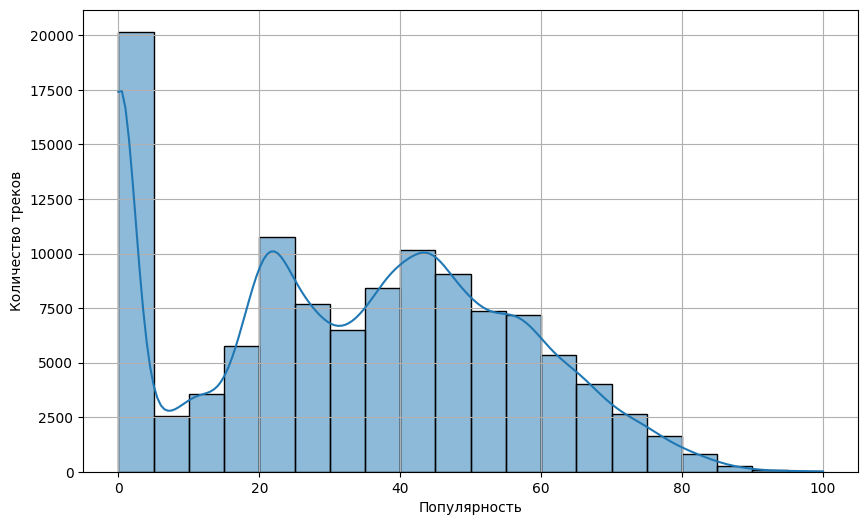

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=20, kde=True)
plt.xlabel('Популярность')
plt.ylabel('Количество треков')
plt.grid(True)
plt.show()

По данной гистограмме можем сделать вывод что популярность распределена не равномерно. Мы видим, что довольно много (около 20000) треков имеют популярность равную 0, что вполне может быть правдой, поэтому не будем считать это ошибкой датасета. Треков с популярностью близкой к 100 крайне мало, что тоже довольно логично. На графике видим два пика по количеству: при популярности = 23+-1 (10000 треков) и при популярности = 44+-1 (10000треков), исходя из этого можно сделать вывод, что в датасете довольно много треков, популярность которых не особо высока, но она и не нулевая, а значит, что у них есть своя аудитория. Так же можно заметить равномерный спад количетсва треков при популярности > 50

Посмотрим зависимость популярности от продолжительности трека

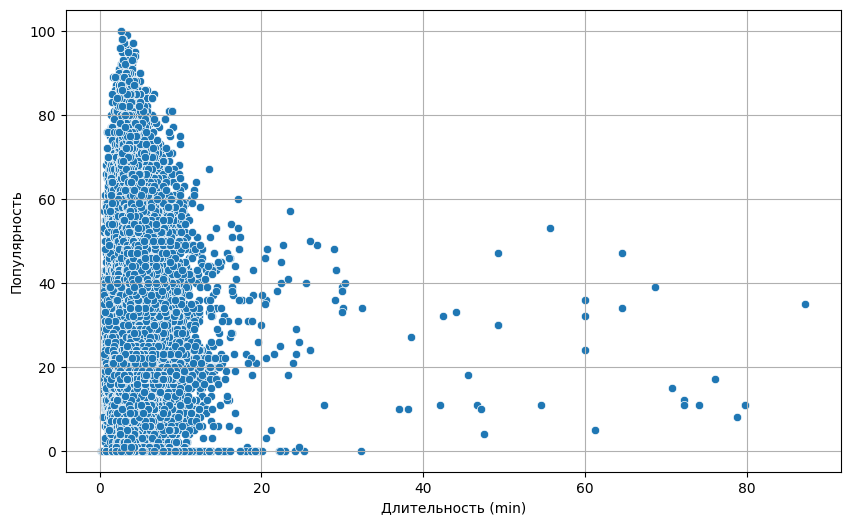

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['duration_ms'] / 60000, y=data['popularity'])
plt.xlabel('Длительность (min)')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

По графику можем сделать вывод, что самые популярные треки по длительности от 2 до 5 минут, а треки длительностью > 20 минут не получили популярность больше 60. Также можно увидеть единичные выбросы по длительности треков (> 20 минут) и все они получили < 60 популярности. Треки с популярностью 0 - 50 в среднем имеют самый большой разброс по длительности, но их популярность распределена довольно равномерно. В целом можно увидеть что большинство треков не занимают по длительности больше 10 - 15 минут.

Посмторим зависмиость популярности от их цензурности (присутсвует нецензурная речь / откровенность или нет)

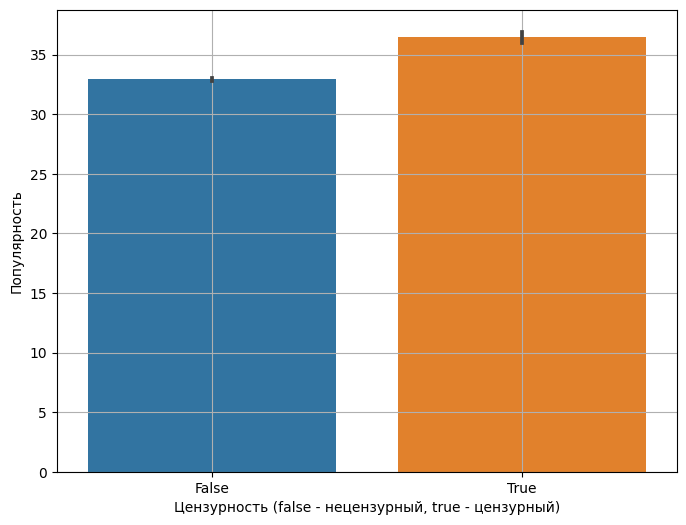

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data['explicit'], y=data['popularity'])
plt.xlabel('Цензурность (false - нецензурный, true - цензурный)')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Видим, что наличие нецензурных слов влияет на популярность треков, ведь она меньше, но всего лишь на 5 пунктов, что незначительно.
В будущем посмотрим на корреляцию и решим что делать с этой колонкой

Посмотрим зависимоть популярности от танцевальности треков, которая измеряется в вещественных числах от 0 до 1

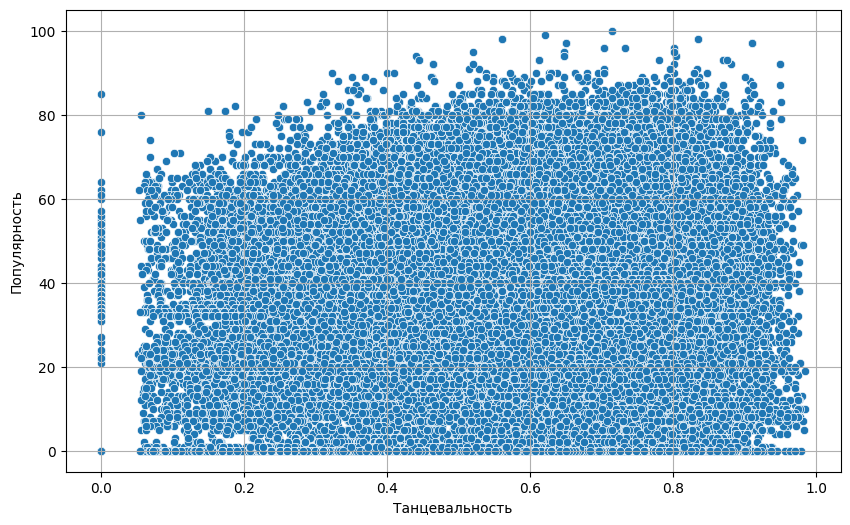

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['danceability'], y=data['popularity'])
plt.xlabel('Танцевальность')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Видим отстутвие танцевальных треков в диапазоне (0,01; 0,08), что довольно странно, и в диапазоне (0,9; 1,0), что странно, но вполне возможно. Треки популярность которых приближается к 90 появляются при танцевальности больше 0,3, а близкой к 100  - больше 0,5. В целом видно, что популярность в зависимости от танцевальности распределена довольно равномерно и в рамках данного графика в среденем образуют форму близкую к прямоугольнику 

Оценим зависимоть популярности от энергичности трека

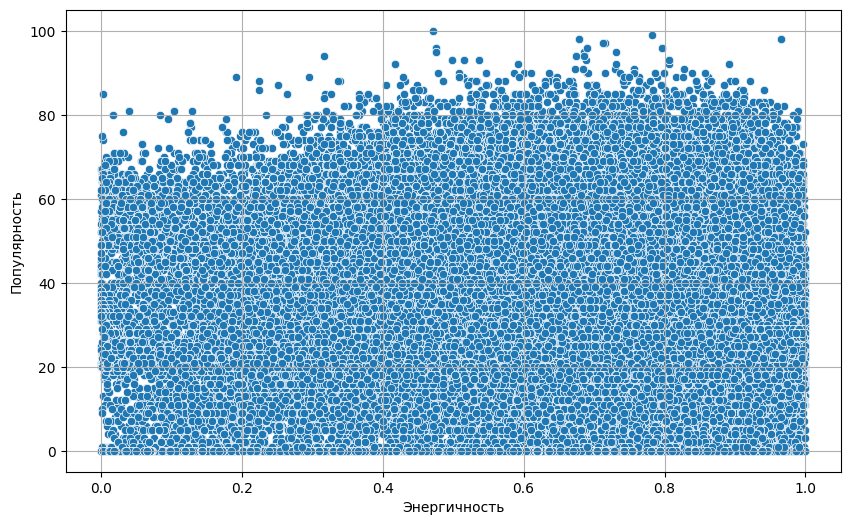

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['energy'], y=data['popularity'])
plt.xlabel('Энергичность')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Распределение равноменое и малоинформативное, но можно отметить, что треки с популярностью близкой к 90 появляются при энергичности > 0.2, близкой к 100 - > 0.5. Отсутвует отсутвие треков как это было в предыдущем графике.

Посмотрим как громкость треков влияет на их популярность

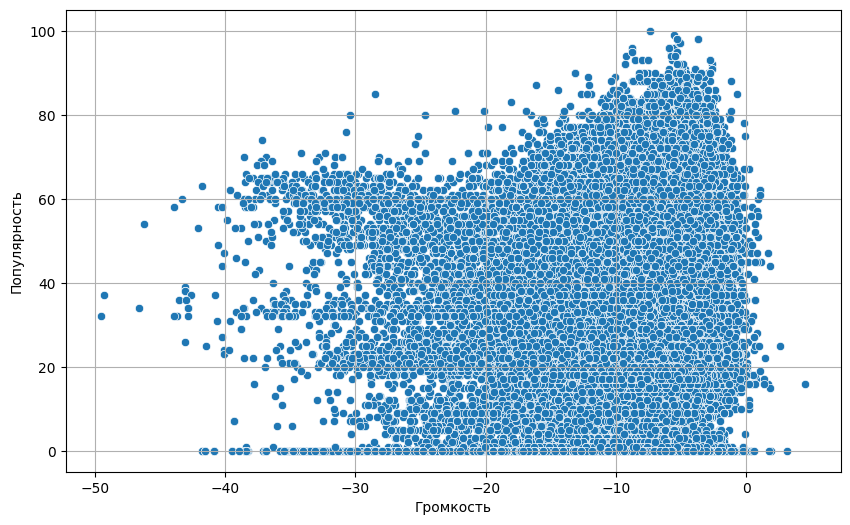

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['loudness'], y=data['popularity'])
plt.xlabel('Громкость')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Трудно понять что имели ввиду создатели датасета когда выбирали такие значения для оценки громкости, но даже так мы можем сделать некоторые выводы.
В этот раз треки распределены неравномерно. Мы видим, что треков с громкостью меньше -25 сильно меньше, чем остальных. Максимальная популярность треков резко уменьшается при громкости равной -10 и меньше, но выравнивается начиная с громкости равной -20. Максимальную популярность имеют треки с громкостью равной -5+-1.

Проверим зависимоть популярность от модальности(мажорные и минорные треки)

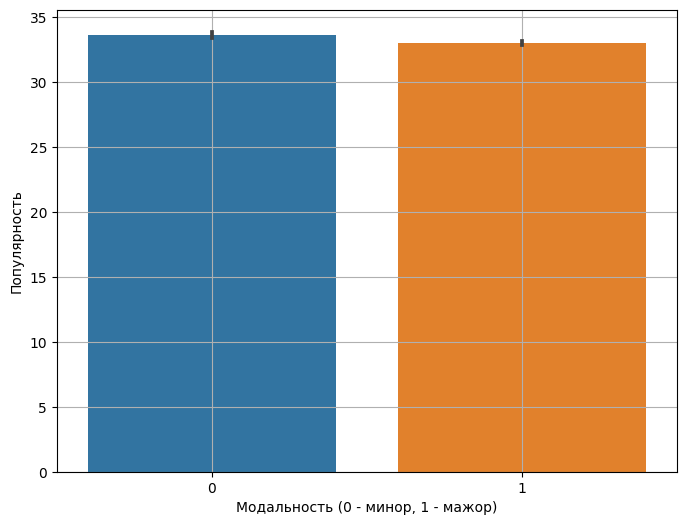

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data['mode'], y=data['popularity'])
plt.xlabel('Модальность (0 - минор, 1 - мажор)')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Видим, что модальность не влияет на популярность треков, ведь нет сильного перевеса в одну из сторон. После провекри корреляции решим что делать с этой характеристикой

Посмотрим, как акустичность влияет на популярность треков

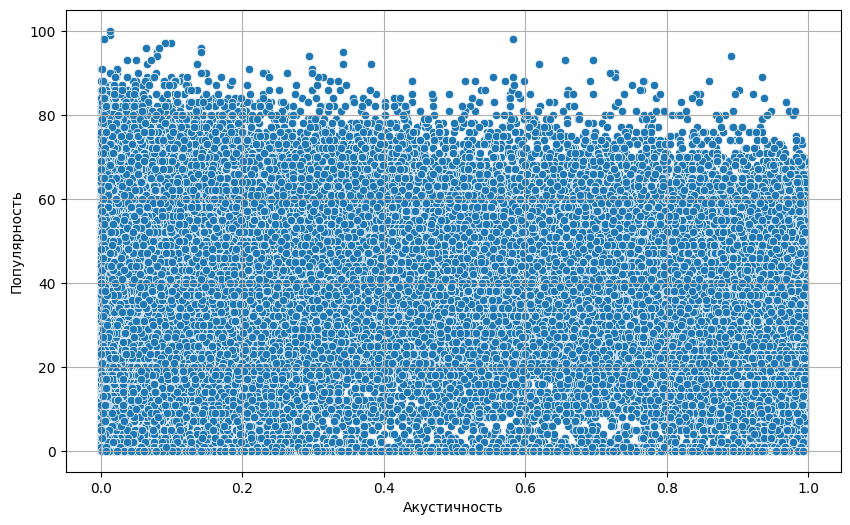

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['acousticness'], y=data['popularity'])
plt.xlabel('Акустичность')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Перед нами равномерное распределение, можем сделать вывод, что акустичность особо никак не влияет на популярность трека, ведь треки с высокой и низкой популярностью есть при любой акустичности. Однако можно увидеть, что при приближении к 1 по оси акустичности количество популярных треков (> 70) снижается.

Посмотрим на влияние доли инструментальных мелодий в треке на его популярность

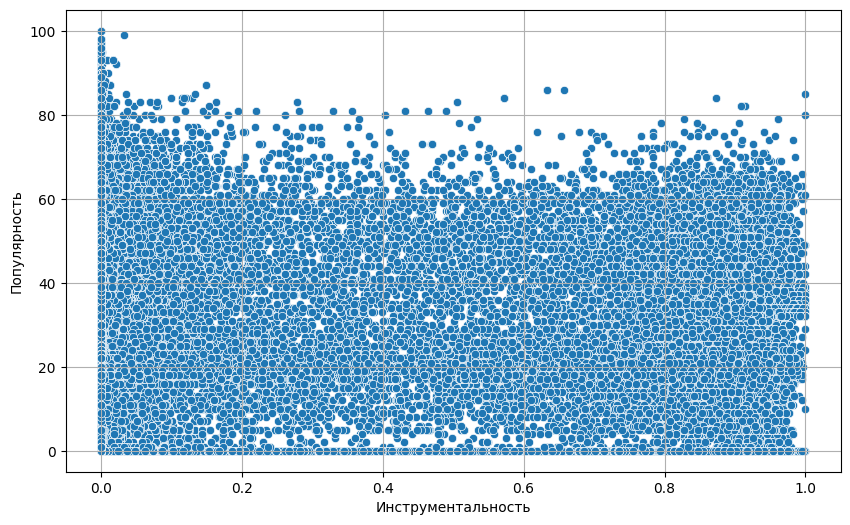

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['instrumentalness'], y=data['popularity'])
plt.xlabel('Инструментальность')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Во-первых, мы можем увидеть, что количетсво треков в которых происходит равное или почти равное (0,2;0,6) смешение доли инструментальности, мало по сравнению с треками, где идёт явный перевес в одну из сторон. Если смотреть как раз таки на треки с перевесом, то можно сделать вывод, что треки без интструментальной музыки имеют большую популярность (доходит до 100), чем те, где такая музыка есть (< 70 за редким исключением)

Посмотрим на влияние живости музыки в треке на его популярность

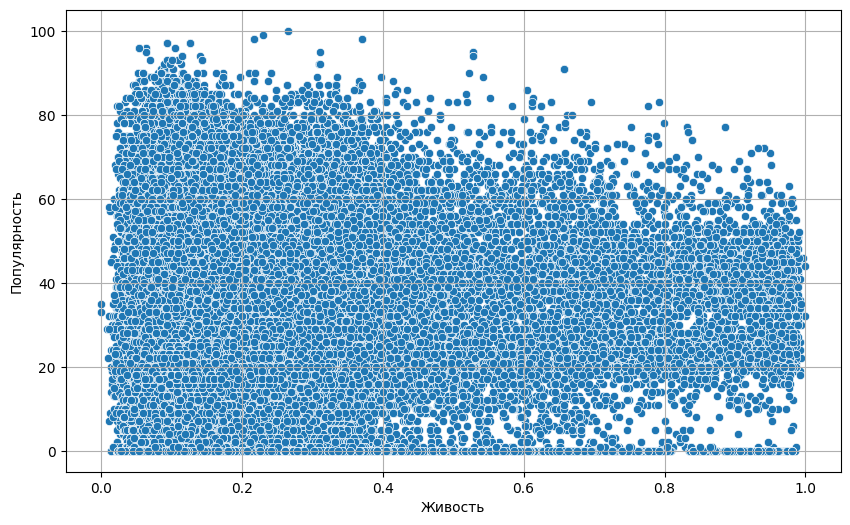

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['liveness'], y=data['popularity'])
plt.xlabel('Живость')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Видим заметное снижение количетсва треков и максимальной популярности при повышении живости. Из этого можно сделать вывод, что большему количетсву людей нравится более спокойная музыка. Если быть говорить точнее, то при живости (0,02; 0,2) треков с популярностью > 80 меньше, чем в интервале (0,2; 0,4), а начиная с 0,4 они практически отсутсвуют. Так же можно выделить, что треки с популярностью (20; 57) довольно равномерно распределены при любой живости. А вот треки с популярностью равной 10, начиная с живости 0,6, и в интервале (1; 18), дальше, практически отсутсвуют.

Посмотрим на влияние числa ритмических единиц в такте (time_signature) в треке на его популярность

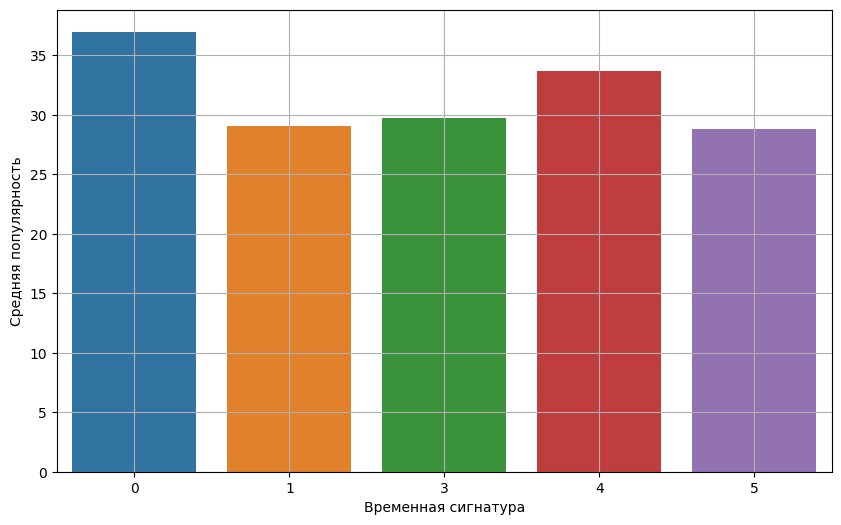

In [24]:
plt.figure(figsize=(10, 6))
popularity = data.groupby('time_signature')['popularity'].mean().sort_index()
sns.barplot(x=popularity.index, y=popularity.values)
plt.xlabel('Временная сигнатура')
plt.ylabel('Средняя популярность')
plt.grid(True)
plt.show()

Мы можем увидеть, что средняя популярность треков выше при 0 ед. в такте и при 4, но разниа между максимальным и минимальным меньше 10, поэтому можем сделать вывод, что временная сигнатура не сильно влияет на популярность трека

Посмотрим на влияние темпа трека на его популярность

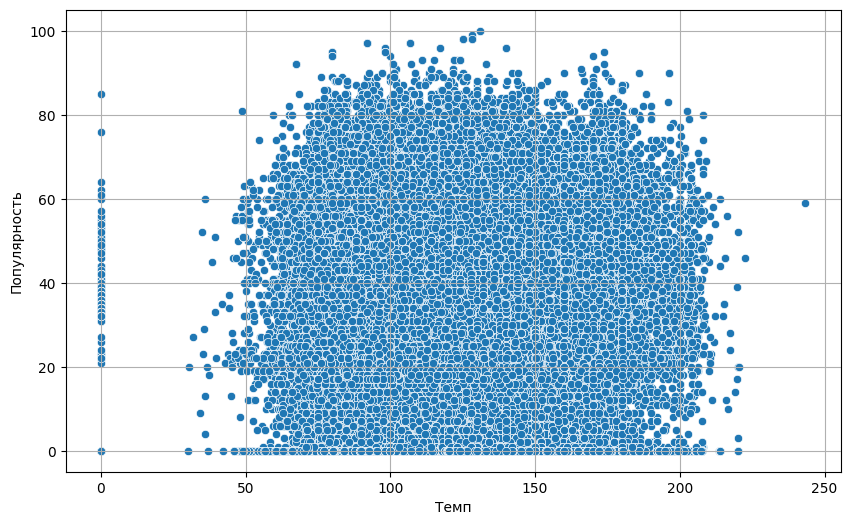

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['tempo'], y=data['popularity'])
plt.xlabel('Темп')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Мы можем заметить отсутсвие треков с темпом < 30 и > 230, кроме некоторых исключений. В остальном же нельзя выявить чёткую зависимоть между темпом трека и его поплуярностью, ведь распределение довольно равномерное (кроме того, что некоторые треки с темпом до 150 чуть более попклярны, чем те, темп которых больше)

Посмотрим на влияние жанра трека на его среднюю популярность

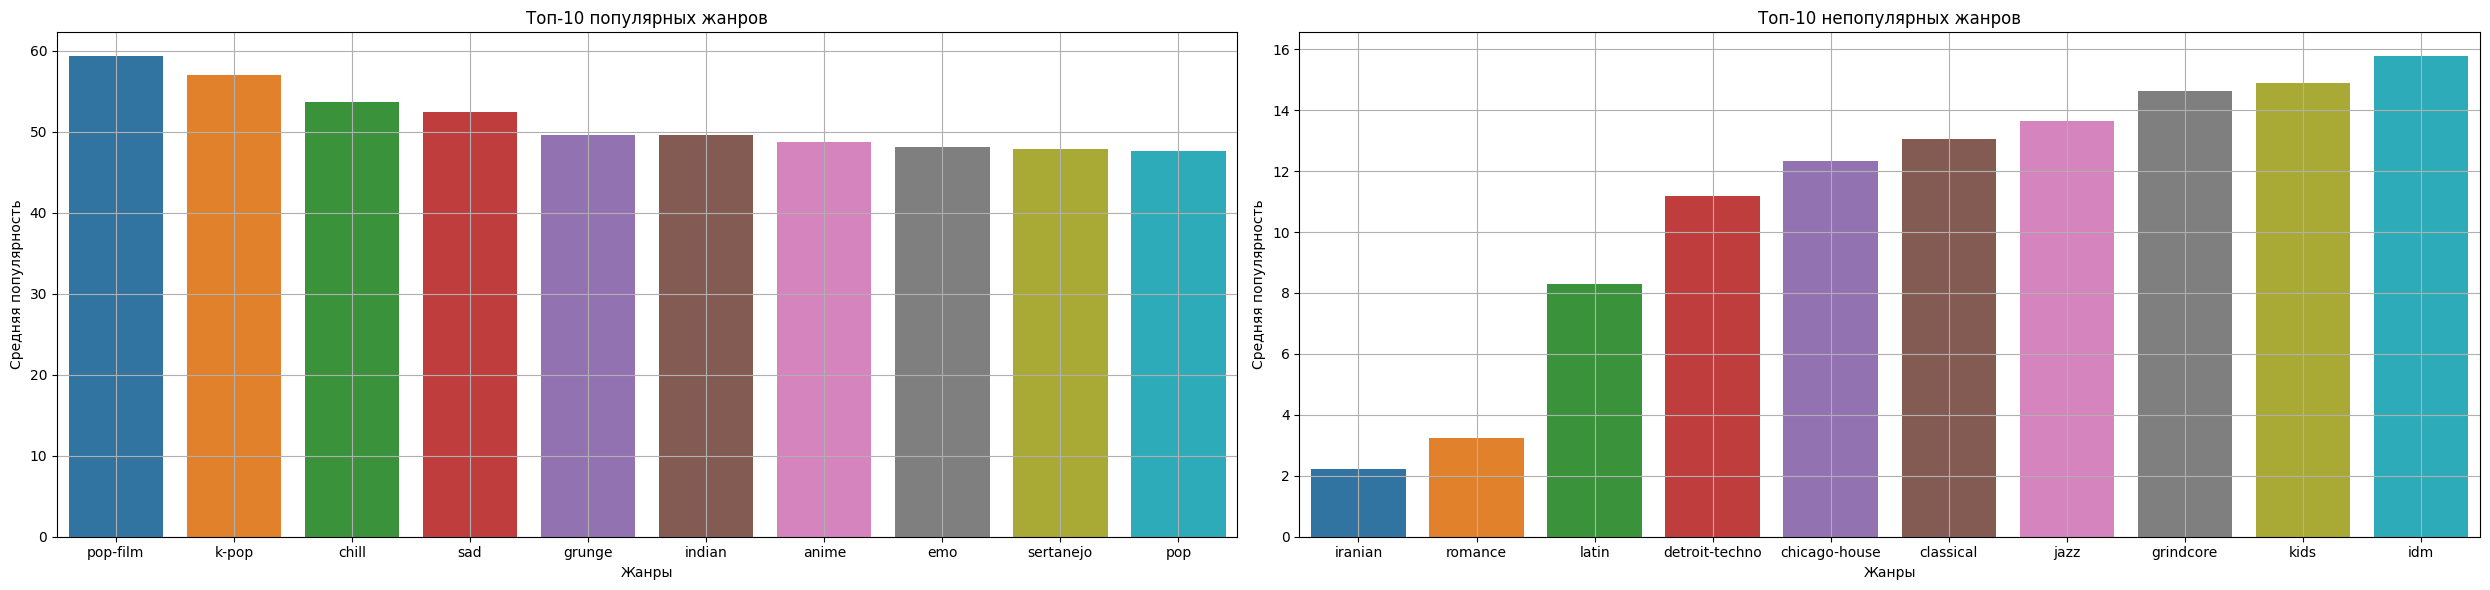

In [26]:
popularity = data.groupby('track_genre')['popularity'].mean()

top_10_popular = popularity.nlargest(10)
top_10_unpopular = popularity.nsmallest(10)

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=top_10_popular.index, y=top_10_popular.values)
plt.title('Топ-10 популярных жанров')
plt.xlabel('Жанры')
plt.ylabel('Средняя популярность')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x=top_10_unpopular.index, y=top_10_unpopular.values)
plt.title('Топ-10 непопулярных жанров')
plt.xlabel('Жанры')
plt.ylabel('Средняя популярность')
plt.grid(True)

plt.tight_layout()
plt.show()

Если брать все жанры, то они просто не влазят на один график, поэтому возьмём 10 самых популярных жанров и 10 самых непопулярных. Из полученных графиков мы можем увидеть, что жанр сильно влияет на популярность песни, ведь pop-film является самым популярным жанром (59), а iranian самым непопулярным (2), между ними целых 57 баллов отрыва. Также можно заметить, что популярность треков от жанра к жанру местами довольно стремительно понижается.

Теперь посмотрим на тепловую карту корреляции характеристик трека с его популярностью. Но для начала с помощью LabelEncoder перекодируем колонки с типом данных  object, перед этим скопировав датасет

In [27]:
new_data = data.copy(deep=True)
categorical_cols = new_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    new_data[col] = le.fit_transform(new_data[col])
    label_encoders[col] = le

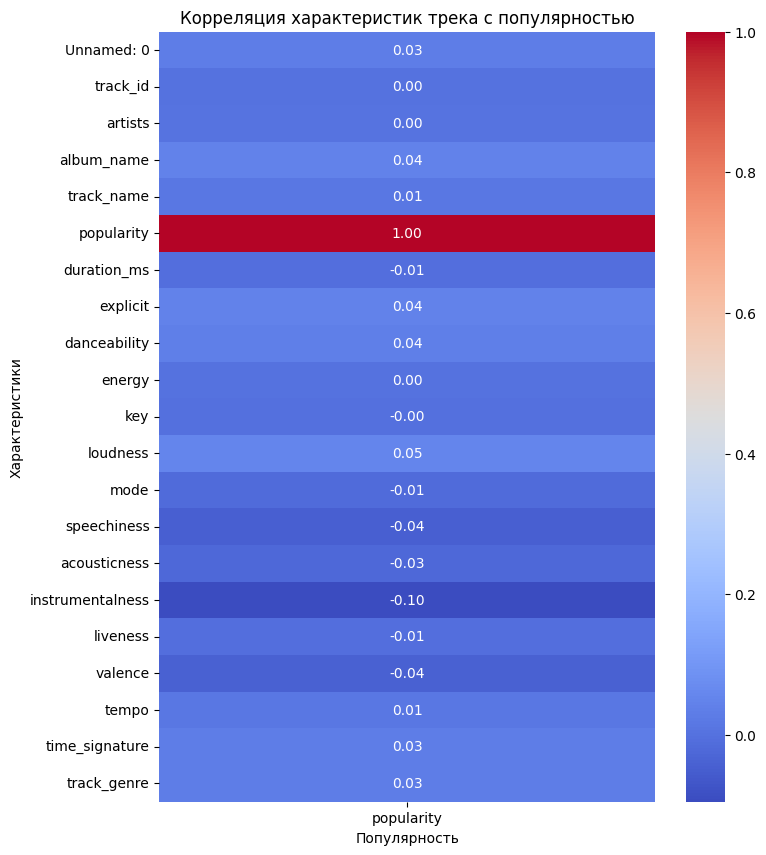

In [28]:
correlation = new_data.corr()

targetCorrelation = correlation[['popularity']]

plt.figure(figsize=(8, 10))
sns.heatmap(targetCorrelation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция характеристик трека с популярностью')
plt.xlabel('Популярность')
plt.ylabel('Характеристики')
plt.show()

Анализ корреляции проведен в рамках отношения корреляции характеристик с таргетом друг с другом, если оценивать как обычную корреляцию(просто по значениям от -1 до 1), то корреляция с таргетом крайне мала. Мы видим, что есть значения особенно близкие к нулю (track_id, artists, track_name, duration_ms, energy, key, mode, liveness, tempo), а это значит что они слабо влияют на наш таргет и мы с большой вероятностью не будем их передавать модели для обучения. Explicit же в свою очередь довольно сильно коррелирует с таргетом, хотя по графику это не скажешь.
Сильнее всего влияют на популярность такие характеристики (album_name, explicit, danceability, loudness, speechiness, instrumentalness, valence).
Среднее влияние оказывают (Unnamed, acousticness, time_signature, track_genre)

# Feature Engineering

Для начала напишем простую модель и посмотрим на данные Feature Importances

In [29]:
X = new_data.drop(columns=['popularity']) 
y = new_data['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 440.2651
Test Loss: 432.7904968261719


Теперь когда модель обучена можно приступить к **Feature Importances**

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

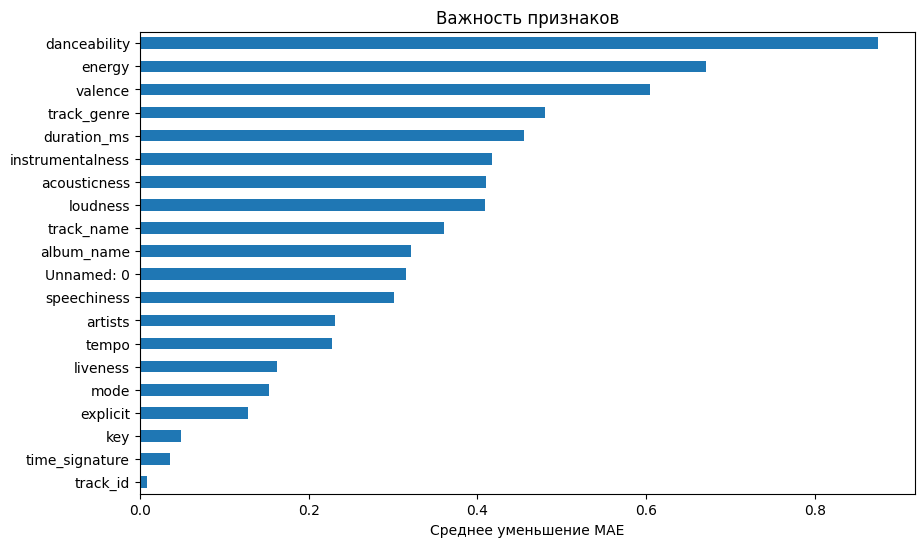

In [31]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

После анализа выведенного графика мы можем сделать выводы:
1. Слабее всего на уменьшение mae влияют характеристики: trakc_id, key, time_signature (два из этих параметров (trakc_id и key) также показали очень слабую корреляцию с таргетом, а вот time_signature показал среднюю).
2. Харатеристики liveness, tempo, mode тоже слабо влияют на mae и показали низкую корреляцию, но они в два раза сильнее, чем предыдущие, поэтому пока подумаем. Удивительно, что довольно сильная по корреляции характеристика explicit стоит рядом по влиянию на mae.
3. Самое сильно влияние показали характеристики dancebility, track_genre, valence и acousticness.

Будем учитывать это и предыдущие выводы при Feature Engineering

Теперь приступим к **Feature Engineering**

In [32]:
data

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

Для начала избавимся от характеристик, которые показали низкую корреляцию и Feature Importances или просто никак не могут влиять на популярность трека

In [33]:
data.drop(columns=['Unnamed: 0', 'track_id', 'key', 'time_signature', 'mode', 'tempo', 'liveness'], inplace=True)

/tmp/ipykernel_24/1428453117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Unnamed: 0', 'track_id', 'key', 'time_signature', 'mode', 'tempo', 'liveness'], inplace=True)


Теперь я хочу перевести длительность трека в минуты (для удобства) и разбить на группы по 5 минут

In [34]:
data['duration_minutes'] = data['duration_ms'] / 60000
bins = range(0, int(data['duration_minutes'].max()), 5) 
labels = [i for i in bins[:-1]]
data['duration_range'] = pd.cut(data['duration_minutes'], bins=bins, labels=labels, right=False)

/tmp/ipykernel_24/1825239134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_minutes'] = data['duration_ms'] / 60000
/tmp/ipykernel_24/1825239134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_range'] = pd.cut(data['duration_minutes'], bins=bins, labels=labels, right=False)


In [35]:
data

artists  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  loudness  speechiness  acousticness  \
0              0.676  0.4610    -6.746       0.1430        0.0322   
1              0.420  0.1660   -17.235       0.0763        0.9240   
2              0.438  0.3590    -9.734       0.0557        0.2100   
3              0.266  0.0596   -18.515       0.0363        0.9050   
4              0.618  0.4430    -9.681       0.0526        0.4690   
...              ...     ...       ...          ...           ...   
113995         0.172  0.2350   -16.393       0.0422        0.6400   
113996         0.174  0.1170   -18.318       0.0401        0.9940   
113997         0.629  0.3290   -10.895       0.0420        0.8670   
113998         0.587  0.5060   -10.889       0.0297        0.3810   
113999         0.526  0.4870   -10.204       0.0725        0.6810   

        instrumentalness  valence  track_genre  duration_minutes  \
0               0.000001   0.7150     acoustic          3.844433   
1               0.000006   0.2670     acoustic          2.493500   
2               0.000000   0.1200     acoustic          3.513767   
3               0.000071   0.1430     acoustic          3.365550   
4               0.000000   0.1670     acoustic          3.314217   
...                  ...      ...          ...               ...   
113995          0.928000   0.0339  world-music          6.416650   
113996          0.976000   0.0350  world-music          6.416667   
113997          0.000000   0.7430  world-music          4.524433   
113998          0.000000   0.4130  world-music          4.731550   
113999          0.000000   0.7080  world-music          4.030433   

       duration_range  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
113995              5  
113996              5  
113997              0  
113998              0  
113999              0  

[113999 rows x 16 columns]

Теперь попроубем совместить некоторые признаки на основе выводов сделанных ранее

Танцевальность и валентность трека довольно схожие характеристики, ведь если трек будет грустным, то танцевать под него не будет хотеться, а если веселым, то может быть и будет

In [36]:
data['valence_danceability'] = data['valence'] * data['danceability']

/tmp/ipykernel_24/2000616191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['valence_danceability'] = data['valence'] * data['danceability']


Таким же образом можно совместить танцевальность и энергичность трека

In [37]:
data['energy_danceability'] = data['energy'] * data['danceability']

/tmp/ipykernel_24/2877546945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['energy_danceability'] = data['energy'] * data['danceability']


Можно перевести speechiness и instrumentalness в буллевские значения (если больше 0.5, ведь во многих треках есть и речь, и интсрументальность)

In [38]:
data['speechiness_bool'] = (data['speechiness'] > 0.5).astype(int)

/tmp/ipykernel_24/2978977430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['speechiness_bool'] = (data['speechiness'] > 0.5).astype(int)


In [39]:
data['instrumentalness_bool'] = (data['instrumentalness'] > 0.5).astype(int)

/tmp/ipykernel_24/1049526387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['instrumentalness_bool'] = (data['instrumentalness'] > 0.5).astype(int)


In [40]:
data


artists  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  loudness  speechiness  acousticness  \
0              0.676  0.4610    -6.746       0.1430        0.0322   
1              0.420  0.1660   -17.235       0.0763        0.9240   
2              0.438  0.3590    -9.734       0.0557        0.2100   
3              0.266  0.0596   -18.515       0.0363        0.9050   
4              0.618  0.4430    -9.681       0.0526        0.4690   
...              ...     ...       ...          ...           ...   
113995         0.172  0.2350   -16.393       0.0422        0.6400   
113996         0.174  0.1170   -18.318       0.0401        0.9940   
113997         0.629  0.3290   -10.895       0.0420        0.8670   
113998         0.587  0.5060   -10.889       0.0297        0.3810   
113999         0.526  0.4870   -10.204       0.0725        0.6810   

        instrumentalness  valence  track_genre  duration_minutes  \
0               0.000001   0.7150     acoustic          3.844433   
1               0.000006   0.2670     acoustic          2.493500   
2               0.000000   0.1200     acoustic          3.513767   
3               0.000071   0.1430     acoustic          3.365550   
4               0.000000   0.1670     acoustic          3.314217   
...                  ...      ...          ...               ...   
113995          0.928000   0.0339  world-music          6.416650   
113996          0.976000   0.0350  world-music          6.416667   
113997          0.000000   0.7430  world-music          4.524433   
113998          0.000000   0.4130  world-music          4.731550   
113999          0.000000   0.7080  world-music          4.030433   

       duration_range  valence_danceability  energy_danceability  \
0                   0              0.483340             0.311636   
1                   0              0.112140             0.069720   
2                   0              0.052560             0.157242   
3                   0              0.038038             0.015854   
4                 

Теперь посмотрим на тепловую карту **корреляции новых характеристик** трека с его популярностью. Но для начала с помощью LabelEncoder перекодируем колонки с типом данных  object, перед этим скопировав датасет

In [41]:
new_data_two = data.copy(deep=True)
categorical_cols = new_data_two.select_dtypes(include=['object', 'category']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    new_data_two[col] = le.fit_transform(new_data_two[col])
    label_encoders[col] = le

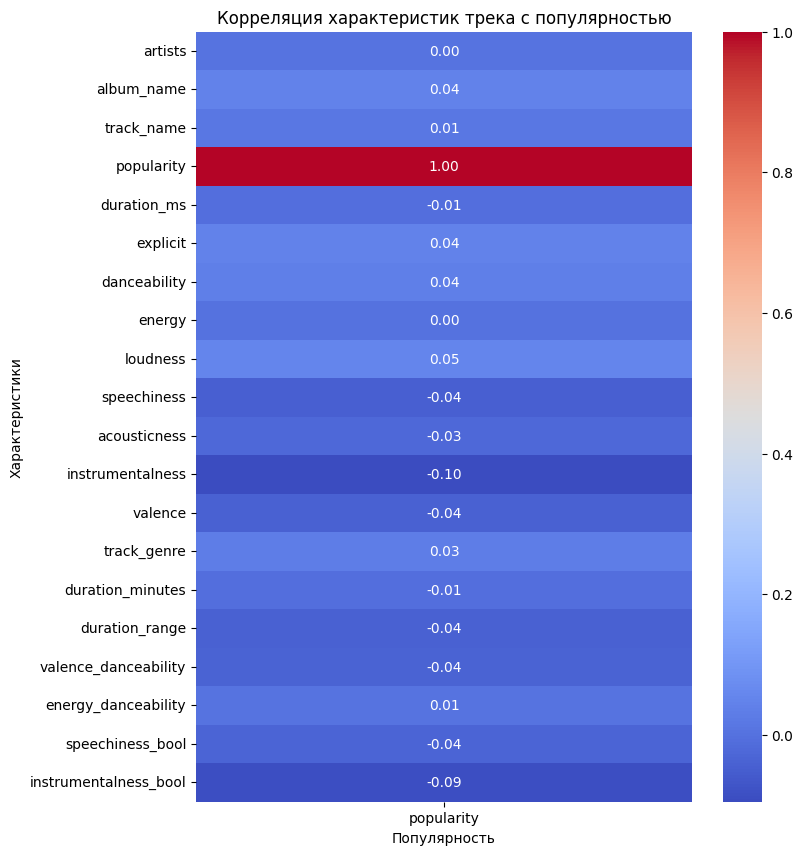

In [42]:
correlation = new_data_two.corr()

targetCorrelation = correlation[['popularity']]

plt.figure(figsize=(8, 10))
sns.heatmap(targetCorrelation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция характеристик трека с популярностью')
plt.xlabel('Популярность')
plt.ylabel('Характеристики')
plt.show()

Мы видим, что из всех новых колонок улучшение по корреляции наблюдается только в duration_range (-0.04 по сравнению с -0.01 в duration_ms).

valence_danceability не получило никаких изменений по сравнению с родительскими характеристиками, так что характеристика бесполезна. energy_danceability скатилась до energy, что хуже, чем danceability.

характиристика speechiness_bool по корреляции никак не изменилась, а вот instrumentalness_bool стала меньше на 0,01, что хуже, но не критично

Посмотрим и на корреляцию колонок друг с другом

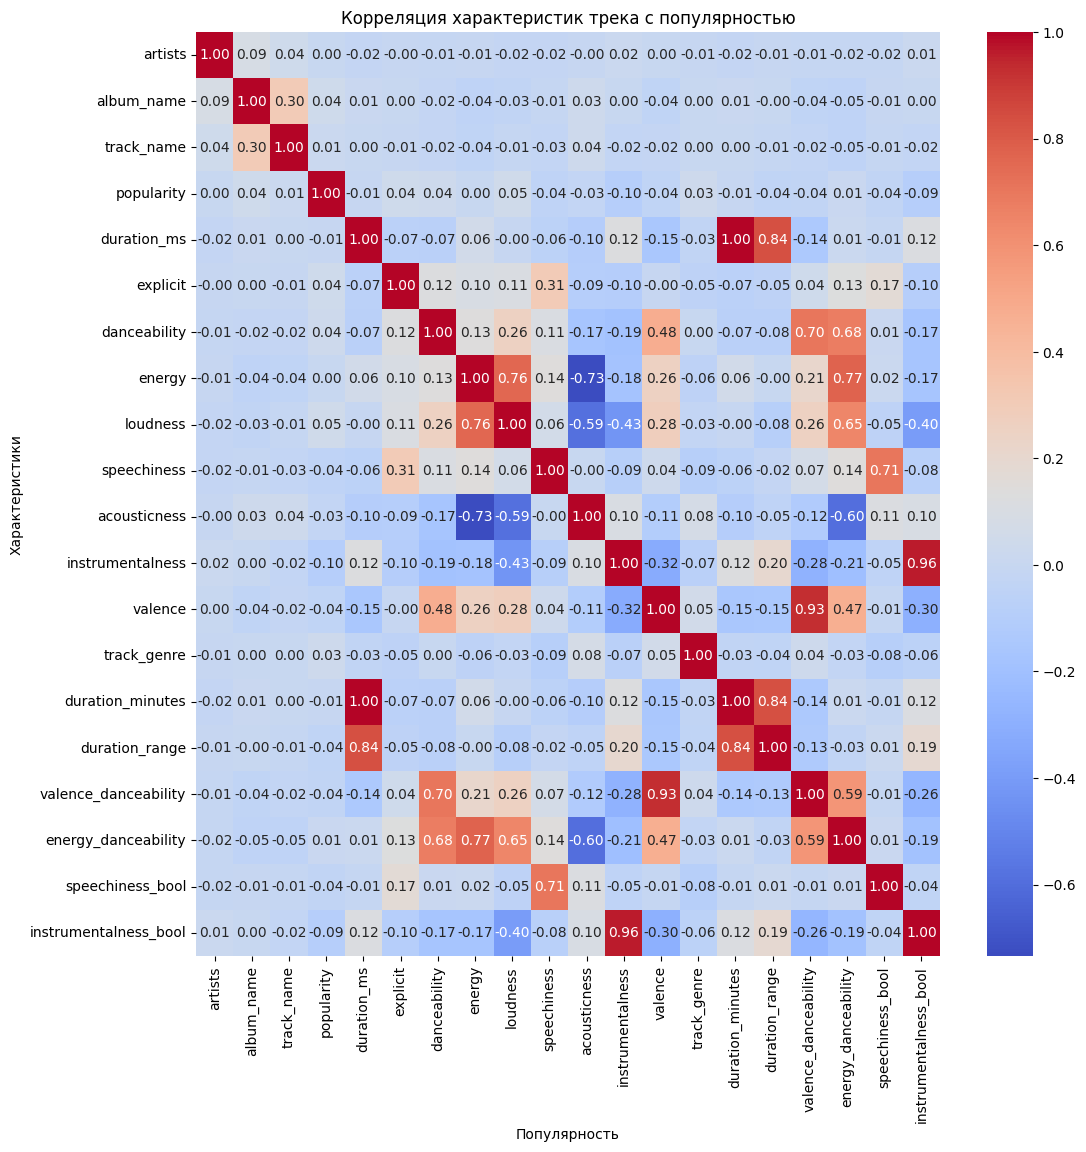

In [43]:
correlation = new_data_two.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция характеристик трека с популярностью')
plt.xlabel('Популярность')
plt.ylabel('Характеристики')
plt.show()

Видим, что duration_ms очень сильно коррелирует с duration_range и duration_ms, поэтому надо будет оставить только одну из этих характеристик.

danceability сильно коррелирует с valence и с двумя новыми параметрами, которые на нем завязаны.

energy сильно коррелирует с loudness и acousticness, а также с новым параметром, который на нем завязан.

Сам loudnes кроме energy довольно сильно коррелирует с acousticness, instrumentalness и energy_danceability с instrumentalness_bool.

speechiness, что логично, довольно сильно коррелируе с новым параметром speechiness_bool.


Раз мы увидели, что energy сильно коррелирует с loudness и acousticness, то составим два новых признака

In [44]:
data['energy_loudness'] = data['energy'] * data['loudness']

/tmp/ipykernel_24/3307525897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['energy_loudness'] = data['energy'] * data['loudness']


In [45]:
data['energy_acousticness'] = data['energy'] * data['acousticness']

/tmp/ipykernel_24/1139743629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['energy_acousticness'] = data['energy'] * data['acousticness']


Также создадим характеристики на основе loudness и acousticness, instrumentalness  

In [46]:
data['loudness_acousticness'] = data['acousticness'] * data['loudness']

/tmp/ipykernel_24/430319361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loudness_acousticness'] = data['acousticness'] * data['loudness']


In [47]:
data['loudness_instrumentalness'] = data['instrumentalness'] * data['loudness']

/tmp/ipykernel_24/4260211202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loudness_instrumentalness'] = data['instrumentalness'] * data['loudness']


Опять перекодируем данные и посмотрим на корреляцию с таргетом

In [48]:
new_data_two = data.copy(deep=True)
categorical_cols = new_data_two.select_dtypes(include=['object', 'category']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    new_data_two[col] = le.fit_transform(new_data_two[col])
    label_encoders[col] = le

In [49]:
new_data_two.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   artists                    113999 non-null  int64  
 1   album_name                 113999 non-null  int64  
 2   track_name                 113999 non-null  int64  
 3   popularity                 113999 non-null  int64  
 4   duration_ms                113999 non-null  int64  
 5   explicit                   113999 non-null  bool   
 6   danceability               113999 non-null  float64
 7   energy                     113999 non-null  float64
 8   loudness                   113999 non-null  float64
 9   speechiness                113999 non-null  float64
 10  acousticness               113999 non-null  float64
 11  instrumentalness           113999 non-null  float64
 12  valence                    113999 non-null  float64
 13  track_genre                113999 

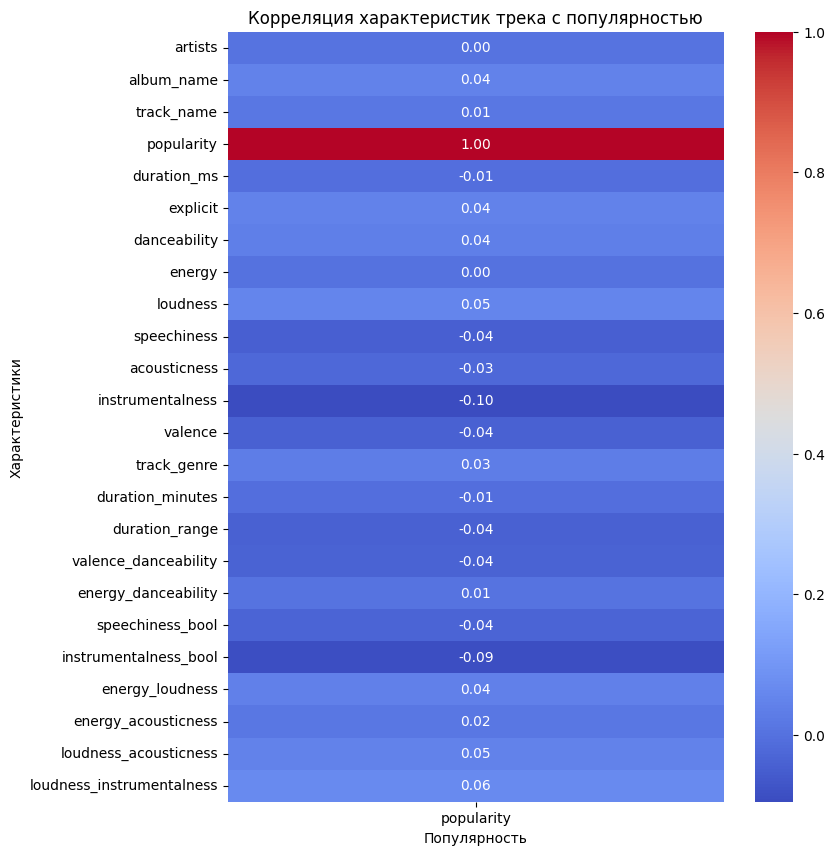

In [50]:
correlation = new_data_two.corr()

targetCorrelation = correlation[['popularity']]

plt.figure(figsize=(8, 10))
sns.heatmap(targetCorrelation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция характеристик трека с популярностью')
plt.xlabel('Популярность')
plt.ylabel('Характеристики')
plt.show()

loudnes_instrumentalness и loudnes_acousticness довольно коррелируют с таргетом, а вот характеристики на основе energy нет

In [51]:
X = new_data_two.drop(columns=['popularity']) 
y = new_data_two['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 437.3116
Test Loss: 432.1539001464844


In [53]:

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 16.78355025180599
MSE: 432.1540785098094
RMSE: 20.788315913267468
MAPE: 1.9332357484127444e+16
R2: 0.12887875755961886


Приступим к Feature Importances

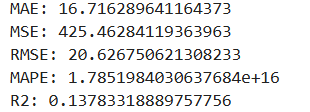

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

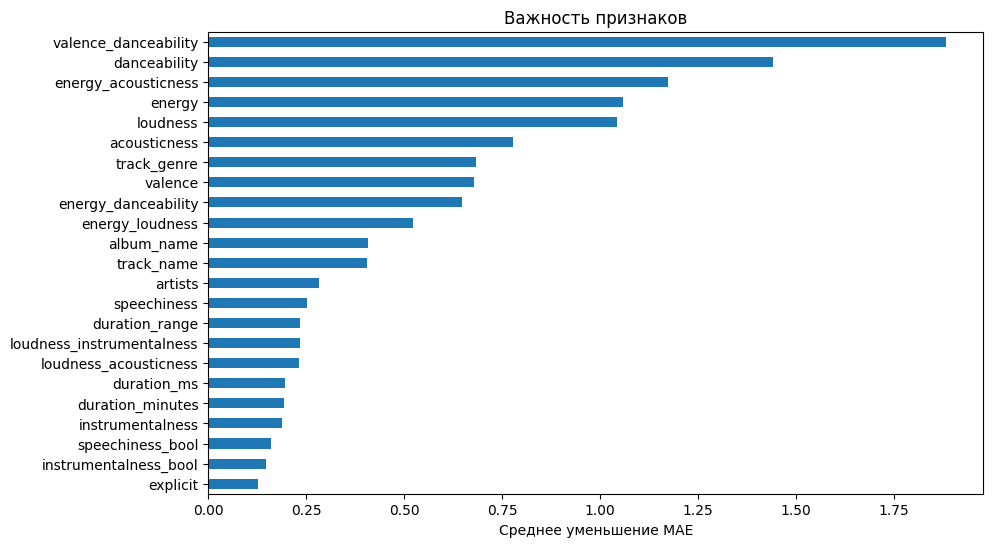

In [54]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Видим, что наша новая характеристика valence_danceability очень сильно влияет на mae, а это значит, что мы угадали и оставим её. В таком случает характеристики danceability и  valence можно убрать (плюс они довольно сильно коррелируют).

energy_acousticness оказывает большее влияние, чем energy или energy_loudness, а вот energy_loudness и loudness_energy влияют слабее, чем loudness

loudness_instrumentalness даёт больший вклад чем instrumentalness_bool или instrumentalness, поэтому посмотрим на корреляцию и решим что делать

speechiness_bool же в свою очередь очень слабо влияет на mae, поэтому удалим данный признак.

То же самое можно сказать и про energy_danceability, поэтому его уберём.

Из характеристик связанных с длительность сильнее всего влияет duration_minutes, поэтому duration_range и duration_ms уберём.

Из оригинальных характеристик слабо влияет explicit, поэтому и его уберём

In [55]:
data.drop(columns=['danceability', 'valence', 'instrumentalness', 'speechiness_bool', 'energy_danceability', 'duration_range', 'duration_ms', 'explicit'], inplace=True)

/tmp/ipykernel_24/3281824190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['danceability', 'valence', 'instrumentalness', 'speechiness_bool', 'energy_danceability', 'duration_range', 'duration_ms', 'explicit'], inplace=True)


Заново посмотрим на корреляцию и решим что делать с отсальными сомнительными характеристиками

In [56]:
new_data_two = data.copy(deep=True)
categorical_cols = new_data_two.select_dtypes(include=['object', 'category']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    new_data_two[col] = le.fit_transform(new_data_two[col])
    label_encoders[col] = le

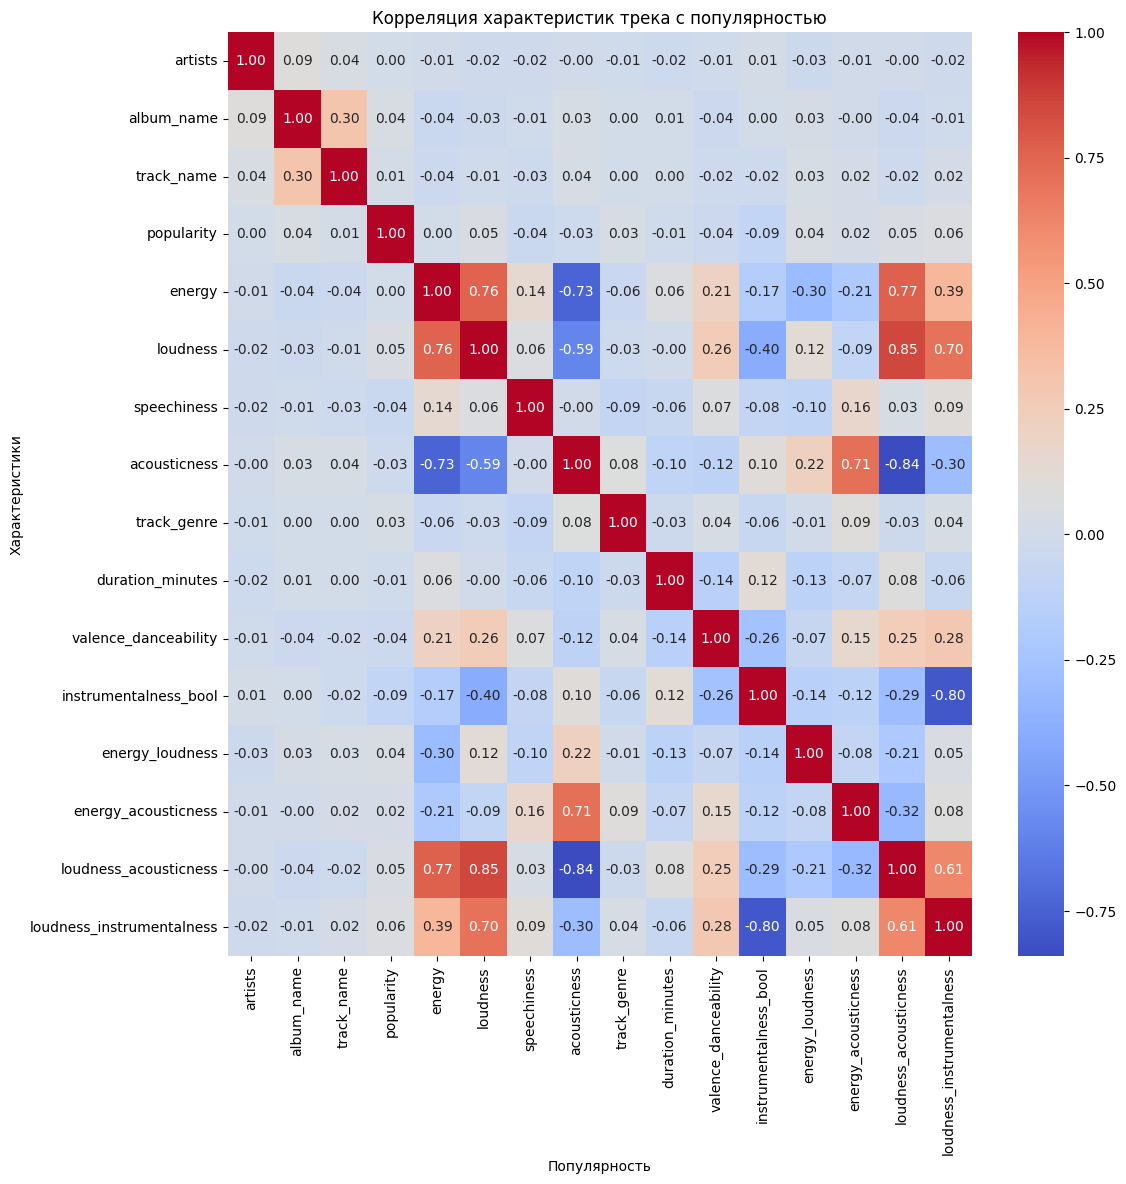

In [57]:
correlation = new_data_two.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция характеристик трека с популярностью')
plt.xlabel('Популярность')
plt.ylabel('Характеристики')
plt.show()

energy сильно коррелируе с loudness, acousticness и loudness_acousticness + вклад loudness_acousticness почти равен loudness и сильно больше acousticness, поэтому оставим loudness_acousticness и energy (т.к вклад очень большой)

Loudness_instrumentalness оставим, хотя и наблюдается сильная корреляция с loudness и loudness_acousticness, а мы уже оставили второй признак, т.к
он сильнее чем instrumentalness_bool

energy_acousticness уберём, ведь уже оставили energy



In [58]:
data.drop(columns=['loudness', 'acousticness', 'instrumentalness_bool', 'energy_acousticness'], inplace=True)

/tmp/ipykernel_24/499713844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['loudness', 'acousticness', 'instrumentalness_bool', 'energy_acousticness'], inplace=True)


In [59]:
data

artists  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  energy  speechiness  \
0                           Comedy          73  0.4610       0.1430   
1                 Ghost - Acoustic          55  0.1660       0.0763   
2                   To Begin Again          57  0.3590       0.0557   
3       Can't Help Falling In Love          71  0.0596       0.0363   
4                          Hold On          82  0.4430       0.0526   
...                            ...         ...     ...          ...   
113995         Sleep My Little Boy          21  0.2350       0.0422   
113996            Water Into Light          22  0.1170       0.0401   
113997              Miss Perfumado          22  0.3290       0.0420   
113998                     Friends          41  0.5060       0.0297   
113999                   Barbincor          22  0.4870       0.0725   

        track_genre  duration_minutes  valence_danceability  energy_loudness  \
0          acoustic          3.844433              0.483340        -3.109906   
1          acoustic          2.493500              0.112140        -2.861010   
2          acoustic          3.513767              0.052560        -3.494506   
3          acoustic          3.365550              0.038038        -1.103494   
4          acoustic          3.314217              0.103206        -4.288683   
...             ...               ...                   ...              ...   
113995  world-music          6.416650              0.005831        -3.852355   
113996  world-music          6.416667              0.006090        -2.143206   
113997  world-music          4.524433              0.467347        -3.584455   
113998  world-music          4.731550              0.242431        -5.509834   
113999  world-music          4.030433              0.372408        -4.969348   

        loudness_acousticness  loudness_instrumentalness  
0                   -0.217221                  -0.000007  
1                  -15.925140                  -0.000096  
2                   -2.044140                  -0.000000  
3                  -16.756075                  -0.001309  
4                   -4.540389                  -0.000000  
...                       ...                        ...  
113995             -10.491520                 -15.212704  
113996             -18.208092                 -17.878368  
113997              -9.445965                  -0.000000  
113998              -4.148709                  -0.000000  
113999              -6.948924                  -0.000000  

[113999 rows x 12 columns]

В ходе Feature Engineering мы провели оценку Feature Importances и посмотрели на общую корреляцию, на основе этого добавили некоторые новые признаки, потом опять провели Feature Importances и уже убрали некоторые новые и оригинальные характиристки песен.

В результате у нас получилось:
1. Убрали оригинальные характеристики (Unnamed: 0, track_id, duration_ms, explicit, danceability, key, loudness, mode, acousticness, instrumentalness, liveness, valence, tempo, time_signature), ведь они давали сильную корреляцию с самими собой + новыми характиристиками, которые юыли построены на их основе и давали больший вклад
2. Добавили новые характиристики(duration_minutes, loudness_instrumentalness, loudness_acousticness, energy_loudness, valence_danceability) в результате анализа корреляции и вклада в обучение модели 

# Эксперименты с моделями машинного обучения/глубокого обучения

Для начала снова закодируем уже финальные данные и на их основе построим модель, которая была дана как базовая

In [60]:
new_data_two = data.copy(deep=True)
categorical_cols = new_data_two.select_dtypes(include=['object', 'category']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    new_data_two[col] = le.fit_transform(new_data_two[col])
    label_encoders[col] = le

In [61]:
X = new_data_two.drop(columns=['popularity']) 
y = new_data_two['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 434.5582
Test Loss: 426.3616638183594
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 16.856978833576044
MSE: 426.36165820013537
RMSE: 20.64852678038158
MAPE: 1.831638841591926e+16
R2: 0.14055491804918274


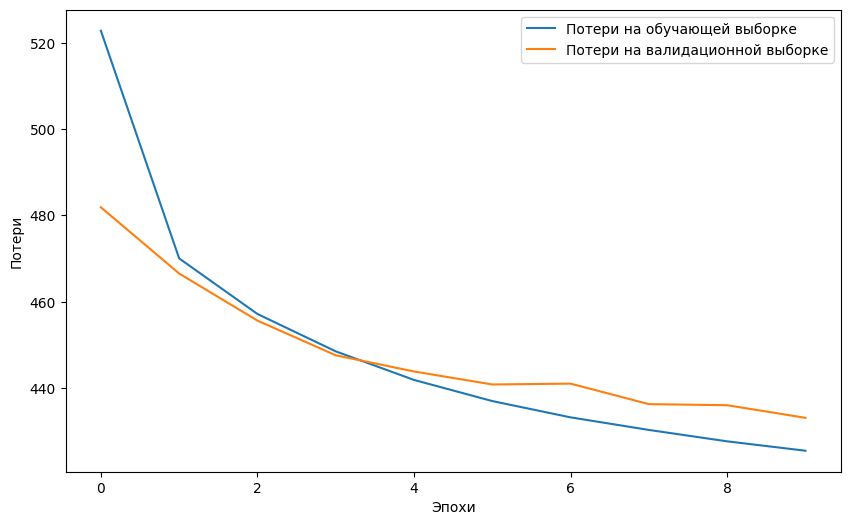

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

Данная модель явлется **нейронной сетью**. Мы видим, что графики потерь довольно похожи друг на друга, значит мы хорошо поработали с данными. Значения метрик данной модели возьмём за изначальные и будем сравнивать с ними все остальные модели.


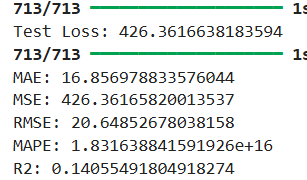
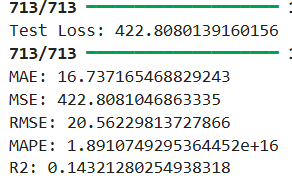

Попробуем увеличить количество эпох и посмторим что из этого выйдет

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 411.6181
Test Loss: 407.4871520996094
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 16.2858764517621
MSE: 407.4871429980356
RMSE: 20.18631078226122
MAPE: 1.7357340949324438e+16
R2: 0.1786015128887124


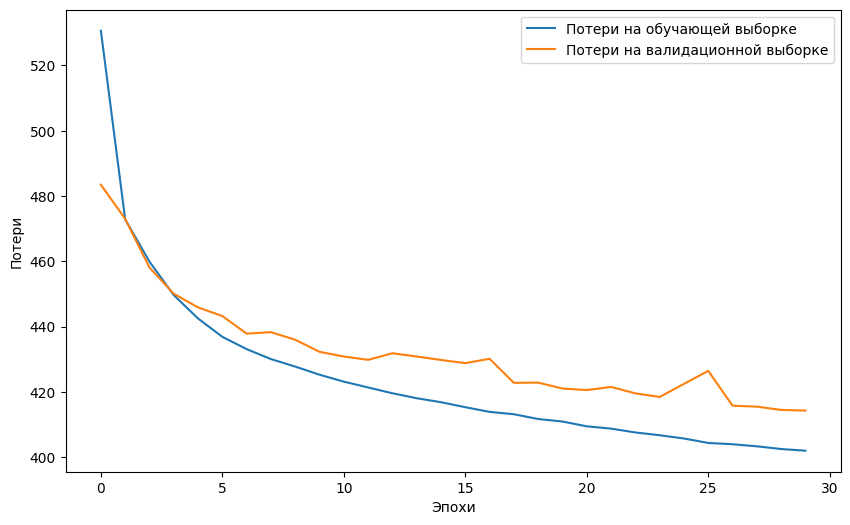

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

График потерь на валид начал идти вверх, значит мы ушли в переобучение.

все метрики кроме r2 понизились, а r2 повысилась, значит мы идем в правильно направлении, теперь попробуем оставить данное количетсво эпох, но поменять архитетуру сети

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 391.4717
Test Loss: 387.8529357910156
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 15.598356626953995
MSE: 387.852954073762
RMSE: 19.693982686946843
MAPE: 1.5364556745084696e+16
R2: 0.2181794317388619


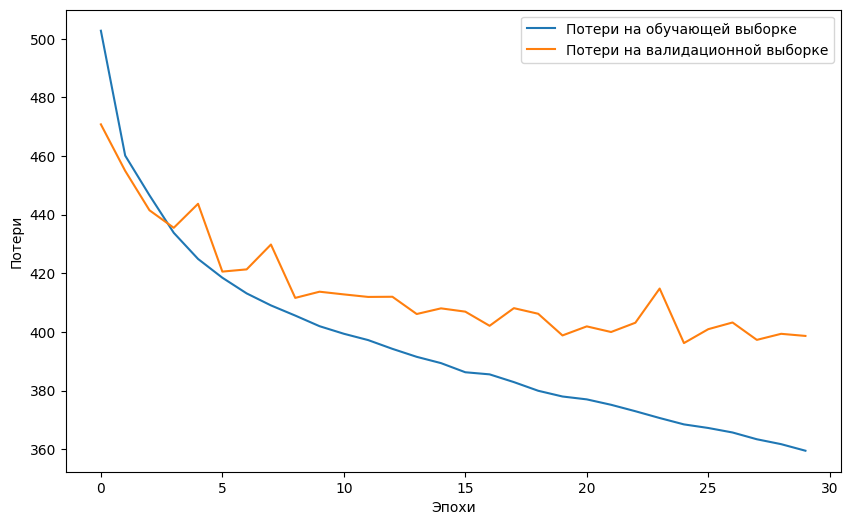

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

Как мы видим, метрика r2 снова незначительно возросла, а все остальные понизились, что не может не радовать, а вот график потерь стал только хуже, поэтому сейчас попробуем добавить dropout

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 421.0821
Test Loss: 416.11016845703125
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 16.41687865741943
MSE: 416.10997272973407
RMSE: 20.398773804563206
MAPE: 1.5282195919607688e+16
R2: 0.16121991099539934


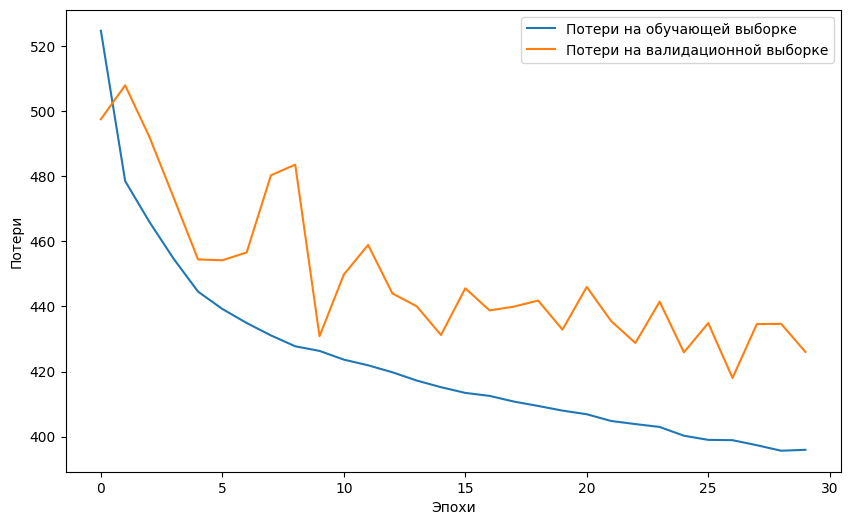

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

И график и метрики стали хуже, попробуем увеличить количетсво слоёв

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 383.7623
Test Loss: 379.4246520996094
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 15.406969615911182
MSE: 379.4245986884356
RMSE: 19.478824366178664
MAPE: 1.5194393382104666e+16
R2: 0.23516901897199027


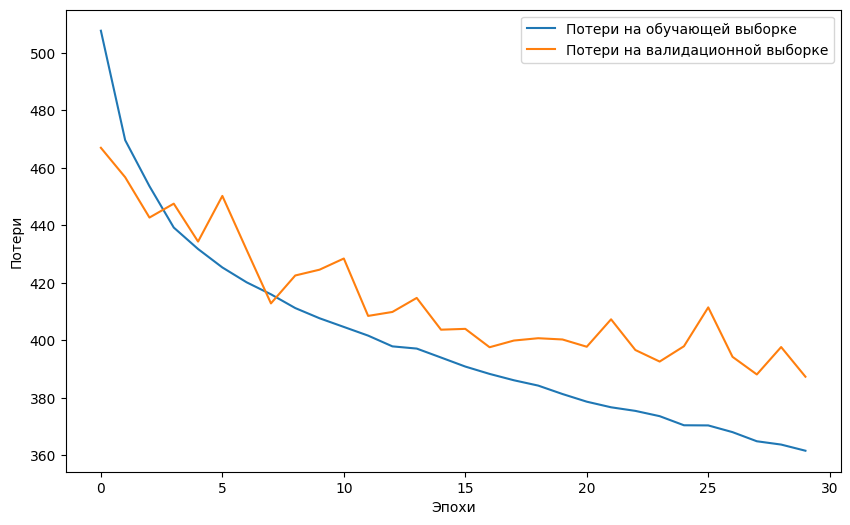

In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

График всё ещё довольно плохой в плане схождения, но вот метрики стали лучше, чем когда-либо были.
Исходя из этого будем считать данную модель лучшей в семейтсве нейронных сетей

Теперь попробуем использовать модель **линейной регрессии**

In [80]:
X = new_data_two.drop(columns=['popularity']) 
y = new_data_two['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

MAE: 18.616193775180136
MSE: 490.3542558385871
RMSE: 22.14394399917474
MAPE: 2.133534860147795e+16
R2: 0.011560853353504652


Метрика намного хуже, чем изначально была у базовой модели нейронной сети. Будем пытаться улучшить

Попробуем запустить модель без свободного члена b

In [82]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

MAE: 19.21796233310553
MSE: 520.8871230823878
RMSE: 22.822951673313156
MAPE: 2.0467851116098332e+16
R2: -0.04998624424743392


Лучше забыть про эту идею, она не увенчалась успехом

Попробуем увеличить количетсво эпох, как это было в предыдущей модели

In [83]:
model = LinearRegression()

for epoch in range(100):
    model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

MAE: 18.616193775180136
MSE: 490.3542558385871
RMSE: 22.14394399917474
MAPE: 2.133534860147795e+16
R2: 0.011560853353504652


Опять плохая идея, ведь это никак не помогло

Попробуем использовать StandardScaler

In [85]:
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_ss, y_train)

y_pred = model.predict(X_test_ss)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

MAE: 18.616193775180133
MSE: 490.3542558385871
RMSE: 22.14394399917474
MAPE: 2.1335348601477948e+16
R2: 0.011560853353504652


Опять ничего не изменилось

Попбробуем применить регуляризацию, например L2

In [86]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

MAE: 18.616232006063896
MSE: 490.3540007728877
RMSE: 22.14393823990863
MAPE: 2.133531028803183e+16
R2: 0.011561367506118359


Всё ещё нет никаких изменений

**Вывод**: модель линейной регрессии по метрикам хуже, чем нейронная сеть, поэтому её мы использовать не будем

Перейдем к **деревьям решений**

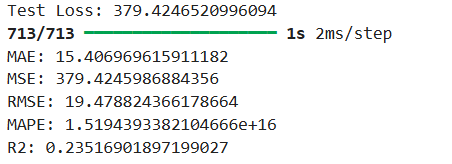


нейронная сеть (лучшее)

In [87]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

MAE: 18.25985219127271
MSE: 478.1840041110727
RMSE: 21.86741878025554
MAPE: 2.0711144787321584e+16
R2: 0.036093225794006645


Метрики лучше, чем у линейной регрессии, но хуже чем у нейронной сети. Попробуем улучшить

Попробуем увеличить максимальную глубину дерева и посмотрим что из этого выйдет 

In [88]:
model = DecisionTreeRegressor(max_depth=5, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

MAE: 17.494541605475135
MSE: 451.840508789082
RMSE: 21.25654037676597
MAPE: 1.9084113654502344e+16
R2: 0.08919553239318867


метрики стали лучше, попробуем увеличить глубину ещё сильнее

In [89]:
model = DecisionTreeRegressor(max_depth=10, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

MAE: 15.324970878462906
MSE: 388.7378088773152
RMSE: 19.71643499411887
MAPE: 1.5380396470181388e+16
R2: 0.21639577203464577


Стало ещё лучше, увеличим ещё сильнее

In [90]:
model = DecisionTreeRegressor(max_depth=20, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

MAE: 12.894576004280918
MSE: 379.4243569136052
RMSE: 19.478818160083666
MAPE: 7661668725170189.0
R2: 0.2351695063333299


Есть ощущение, что модель переобучается, попроубем отлавлиавть это с помощью метрик на валидационных и тестовых данных

In [92]:
y_train_pred = model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Train MAE: {train_mae}')
print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train MAPE: {train_mape}')
print(f'Train R2: {train_r2}')

Train MAE: 5.426794091282486
Train MSE: 106.79011771665049
Train RMSE: 10.333930409899734
Train MAPE: 3274986236690512.5
Train R2: 0.7854945120107193


Метрики кроме r2 на обучении сильно нижк, чем на тесте, а r2 наоборот, это может говорить о том, что модель переобучена.

Проверим предыдущие модели с меньшей глубиной

In [95]:
model = DecisionTreeRegressor(max_depth=10, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Train MAE: {train_mae}')
print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train MAPE: {train_mape}')
print(f'Train R2: {train_r2}')



MAE: 15.324970878462906
MSE: 388.7378088773152
RMSE: 19.71643499411887
MAPE: 1.5380396470181388e+16
R2: 0.21639577203464577
Train MAE: 14.814607194630563
Train MSE: 367.0211530362796
Train RMSE: 19.157796142465855
Train MAPE: 1.4856519095486058e+16
Train R2: 0.26277774369228435


Всё еще может быть переобучена

In [96]:
model = DecisionTreeRegressor(max_depth=7, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Train MAE: {train_mae}')
print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train MAPE: {train_mape}')
print(f'Train R2: {train_r2}')



MAE: 16.724040786034642
MSE: 429.078269766069
RMSE: 20.714204540992373
MAPE: 1.8062306029996464e+16
R2: 0.1350788664272603
Train MAE: 16.60928915477236
Train MSE: 424.5762191330416
Train RMSE: 20.60524736888741
Train MAPE: 1.780815956625521e+16
Train R2: 0.14716894202302377


Переобучение если и есть, то небольшое, отсавим данную глубину, но поставим минимальное количество выборок для узла

In [108]:
model = DecisionTreeRegressor(max_depth=7, min_samples_split=1000, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Train MAE: {train_mae}')
print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train MAPE: {train_mape}')
print(f'Train R2: {train_r2}')

MAE: 17.03695380040664
MSE: 438.6286910106508
RMSE: 20.943464159748043
MAPE: 1.8695749321773296e+16
R2: 0.11582745764940638
Train MAE: 16.950764275909147
Train MSE: 435.24026682486164
Train RMSE: 20.862412775728068
Train MAPE: 1.8496273101193812e+16
Train R2: 0.12574845103579302


Стало хуже, попроубем потсавить другое значение

In [112]:
model = DecisionTreeRegressor(max_depth=7, min_samples_split=20, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Train MAE: {train_mae}')
print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train MAPE: {train_mape}')
print(f'Train R2: {train_r2}')

MAE: 16.724040786034642
MSE: 429.078269766069
RMSE: 20.714204540992373
MAPE: 1.8062306029996464e+16
R2: 0.1350788664272603
Train MAE: 16.60928915477236
Train MSE: 424.5762191330416
Train RMSE: 20.60524736888741
Train MAPE: 1.780815956625521e+16
Train R2: 0.14716894202302377


Вообще уберём этот параметр, он либо никак не влияет в худшую сторону

Добавим минимальное количество выборок в листе

In [114]:
model = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Train MAE: {train_mae}')
print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train MAPE: {train_mape}')
print(f'Train R2: {train_r2}')

MAE: 16.726747753108043
MSE: 429.0333090771459
RMSE: 20.71311925029994
MAPE: 1.8073914264219972e+16
R2: 0.13516949662871702
Train MAE: 16.614505738054678
Train MSE: 424.68028654885666
Train RMSE: 20.607772479063733
Train MAPE: 1.7813146074016136e+16
Train R2: 0.1469599055289128


Измененения опять незначительные, поменяем значение

In [118]:
model = DecisionTreeRegressor(max_depth=7,  min_samples_leaf=10, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Train MAE: {train_mae}')
print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train MAPE: {train_mape}')
print(f'Train R2: {train_r2}')

MAE: 16.73438504343828
MSE: 429.1492898880011
RMSE: 20.715918755585065
MAPE: 1.8064002567930024e+16
R2: 0.13493570652218878
Train MAE: 16.623299866254552
Train MSE: 424.9072868501462
Train RMSE: 20.61327938126649
Train MAPE: 1.782538988290369e+16
Train R2: 0.1465039381468839


Изменения всё-таки есть, но в худшую сторону

**Вывод**: деревья решений по предсказаниям лучше линейной регрессии, но всё ещё хуже, чем нейронная сеть, поэтому не будем их использовать

Перейдём к **модели градиентного бустинга**

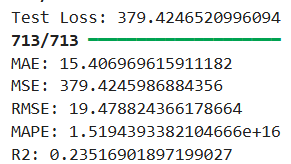

нейронная сеть (лучшее)


In [120]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(
    n_estimators=100,  
    learning_rate=0.1, 
    max_depth=3,  
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")

MAE: 15.84717754655614
MSE: 383.71674413011016
RMSE: 19.588689188664723
MAPE: 1.775897260869787e+16
R2: 0.22651706066401955
Train MAE: 15.80534142870543
Train MSE: 383.10749831850296
Train RMSE: 19.573132051833273
Train MAPE: 1.763425247060101e+16
Train R2: 0.23046567757130676


Метрика близка к лучшей метрики для нейронной сети. Переобучения нет. Будем улучшать

Попробуем увеличить количество деревьев

In [123]:
model = GradientBoostingRegressor(
    n_estimators=190,  
    learning_rate=0.1, 
    max_depth=3,  
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")

MAE: 14.803696988457347
MSE: 346.7171713905773
RMSE: 18.62034294503131
MAPE: 1.6081600281003726e+16
R2: 0.30109951950778946
Train MAE: 14.7364883990834
Train MSE: 345.25875163936877
Train RMSE: 18.581139675471167
Train MAPE: 1.596298482423353e+16
Train R2: 0.30649110061402796


Все метрики улучшились, переобучения также не наблюдается, продолжаем эксперименты, но теперь повысим глубину деревьев 

In [124]:
model = GradientBoostingRegressor(
    n_estimators=200,  
    learning_rate=0.1, 
    max_depth=5,  
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")

MAE: 12.637208601824767
MSE: 271.5317536444495
RMSE: 16.478220584894764
MAPE: 1.2839338152642034e+16
R2: 0.45265568379589116
Train MAE: 12.274514753522979
Train MSE: 258.1691648358482
Train RMSE: 16.067643412642944
Train MAPE: 1.2533619304334614e+16
Train R2: 0.4814248371386135


Метрики стали ещё лучше, но модель начала переобучаться. Для снижения переобучаемости попробуем использовать случайные подвыборки  

In [127]:
model = GradientBoostingRegressor(
    n_estimators=200,  
    learning_rate=0.1, 
    max_depth=5,  
    random_state=42,
    subsample=0.8
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")

MAE: 12.63204132603186
MSE: 269.5374736899663
RMSE: 16.41759646507266
MAPE: 1.2684224991560102e+16
R2: 0.45667568434225636
Train MAE: 12.244687833905797
Train MSE: 255.43760385972806
Train RMSE: 15.982415457612408
Train MAPE: 1.237575973750564e+16
Train R2: 0.4869116259228511


Всё ещё наблюдаем переобучение. Данное решение не помогло, но метрики стали незначительно лучше

In [129]:
model = GradientBoostingRegressor(
    n_estimators=200,  
    learning_rate=0.1, 
    max_depth=5,  
    random_state=42,
    subsample=0.6
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")

MAE: 12.644966895491525
MSE: 269.48380205252226
RMSE: 16.415961807110854
MAPE: 1.2682715175504396e+16
R2: 0.4567838737724135
Train MAE: 12.258110218697674
Train MSE: 255.36232869575872
Train RMSE: 15.980060347062484
Train MAPE: 1.2318563838515254e+16
Train R2: 0.4870628284510059


Метрики опять слегка улучшились, но всё ещё наблюдается переобучение

Попробуем использовать для обучения не все признаки, а только их часть, 

In [130]:
model = GradientBoostingRegressor(
    n_estimators=200,  
    learning_rate=0.1, 
    max_depth=5,  
    random_state=42,
    subsample=0.6,
    max_features=0.5
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")

MAE: 13.193453786920298
MSE: 288.4144821367889
RMSE: 16.982770154977334
MAPE: 1.3400888251360086e+16
R2: 0.4186240637062605
Train MAE: 12.782793558313006
Train MSE: 272.76477019655306
Train RMSE: 16.515591730136496
Train MAPE: 1.2905284722477404e+16
Train R2: 0.4521071669520883


Модель всё ещё переобучается + метрики стали значительно хуже.
Попробуем другое значение для max_features

In [131]:
model = GradientBoostingRegressor(
    n_estimators=200,  
    learning_rate=0.1, 
    max_depth=5,  
    random_state=42,
    subsample=0.6,
    max_features="log2"
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")

MAE: 13.899248954598264
MSE: 314.08945504397343
RMSE: 17.722569087013696
MAPE: 1.454624245678617e+16
R2: 0.36686934146540107
Train MAE: 13.495452924394053
Train MSE: 297.3445334337044
Train RMSE: 17.243680971118213
Train MAPE: 1.4040625111110248e+16
Train R2: 0.40273467612071945


Стало ещё хуже, поэтому поменяем на "sqrt"

In [132]:
model = GradientBoostingRegressor(
    n_estimators=200,  
    learning_rate=0.1, 
    max_depth=5,  
    random_state=42,
    subsample=0.6,
    max_features="sqrt"
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")

MAE: 13.899248954598264
MSE: 314.08945504397343
RMSE: 17.722569087013696
MAPE: 1.454624245678617e+16
R2: 0.36686934146540107
Train MAE: 13.495452924394053
Train MSE: 297.3445334337044
Train RMSE: 17.243680971118213
Train MAPE: 1.4040625111110248e+16
Train R2: 0.40273467612071945


Ничего не изменилось, пропробуем убрать этот гипперпараметр и уменьшить скорость обучения, чтобы модель обучалась плавнее

In [133]:
model = GradientBoostingRegressor(
    n_estimators=200,  
    learning_rate=0.05, 
    max_depth=5,  
    random_state=42,
    subsample=0.6,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")

MAE: 13.77217993209524
MSE: 310.0303498629662
RMSE: 17.607678718756944
MAPE: 1.4674179714982506e+16
R2: 0.37505154527721807
Train MAE: 13.57198523452923
Train MSE: 302.39479199441087
Train RMSE: 17.389502350395507
Train MAPE: 1.4446571012049172e+16
Train R2: 0.3925904024725644


Переобучение немного снизились, но метрики всё ещё меньше максимальных выбитых. Попробуем повысить количество деревьев и понизить на один глубину

In [134]:
model = GradientBoostingRegressor(
    n_estimators=400,  
    learning_rate=0.05, 
    max_depth=4,  
    random_state=42,
    subsample=0.6,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")

MAE: 13.547015983886272
MSE: 302.8898759834641
RMSE: 17.403731668336654
MAPE: 1.4198042399297666e+16
R2: 0.38944506552114133
Train MAE: 13.34909413554511
Train MSE: 295.55380319633906
Train RMSE: 17.191678312379484
Train MAPE: 1.4017532477310336e+16
Train R2: 0.4063316518675054


Вернем скорость обучения к прежнему значению, т.к метрика улучшается, но всё ещё ниже максимальной, а переобучение не такое и высокое

In [138]:
X = new_data_two.drop(columns=['popularity']) 
y = new_data_two['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(
    n_estimators=400,  
    learning_rate=0.1, 
    max_depth=4,  
    random_state=42,
    subsample=0.6,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")

MAE: 12.450426610917406
MSE: 263.8072941324701
RMSE: 16.24214561357181
MAPE: 1.243927815163937e+16
R2: 0.4682263820766046
Train MAE: 12.077536617565094
Train MSE: 250.1915599658709
Train RMSE: 15.81744479888806
Train MAPE: 1.2107713146066416e+16
Train R2: 0.4974491665635573


Метрика самая лучшая из всех выбитых, а переобучение не такое уж и высокое, поэтому будем считать данную модель самой лучшей.

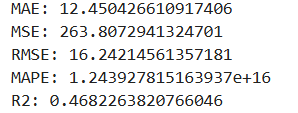

**Вывод**: градиентный бустинг показал себя лучше всего в рамках данной задачи, поэтому обретает звание лучшей модели и отпраляется на кросс валидацию

**Кросс-валидация**

In [140]:
from sklearn.model_selection import KFold

X = new_data_two.drop(columns=['popularity']) 
y = new_data_two['popularity'] 

model = GradientBoostingRegressor(
    n_estimators=400,  
    learning_rate=0.1, 
    max_depth=4,  
    random_state=42,
    subsample=0.6,
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_avg = []
mse_avg = []
rmse_avg = []
mape_avg = []
r2_avg = []

for fold, (train, test) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mae_avg.append(mae)
    mse_avg.append(mse)
    rmse_avg.append(rmse)
    mape_avg.append(mape)
    r2_avg.append(r2)
    
    print(f"Fold {fold + 1}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")
    print(f"R2: {r2}")
    print("-" * 25)

print("Средние значения метрик:")
print(f"Среднее MAE: {np.mean(mae_avg)}")
print(f"Среднее MSE: {np.mean(mse_avg)}")
print(f"Среднее RMSE: {np.mean(rmse_avg)}")
print(f"Среднее MAPE: {np.mean(mape_avg)}")
print(f"Среднее R2: {np.mean(r2_avg)}")

Fold 1:
MAE: 12.438813217822648
MSE: 262.99585223612155
RMSE: 16.217146858683915
MAPE: 1.2254196307393398e+16
R2: 0.4698620585819676
-------------------------
Fold 2:
MAE: 12.523909224956402
MSE: 266.63064543425963
RMSE: 16.32882866081519
MAPE: 1.218091748516378e+16
R2: 0.4653360886921659
-------------------------
Fold 3:
MAE: 12.5998511440198
MSE: 269.8046211351794
RMSE: 16.425730459714096
MAPE: 1.2792777308780598e+16
R2: 0.4589264654529168
-------------------------
Fold 4:
MAE: 12.299899379563078
MSE: 260.20691402733075
RMSE: 16.13093035219391
MAPE: 1.1985323820852496e+16
R2: 0.4745408744314268
-------------------------
Fold 5:
MAE: 12.487886913055052
MSE: 265.5502371505136
RMSE: 16.295712232072386
MAPE: 1.2297149082382346e+16
R2: 0.4676166767110671
-------------------------
Средние значения метрик:
Среднее MAE: 12.470071975883396
Среднее MSE: 265.037653996681
Среднее RMSE: 16.2796697126959
Среднее MAPE: 1.2302072800914524e+16
Среднее R2: 0.4672564327739089


# ИТОГОВЫЙ ВЫВОД

1. В рамках анализа данного датасета во время выполнения первой части работы мной были построены различные графики и выявлены зависимости, которые в дальнейшем помогли на этапе Feature Engineering. Также хочется сказать, что мне понравилось строить необычные и иногда непонятные графики, а в дальнейшем анализировать их. Интереса добавило и то, что датасет довольно большой
2. На этапе Feature Engineering я довольно плотно проанализировал корреляцию колонок с таргетом и друг с другом, и хочу сказать, что иногда эта корреляция была немного не похожа на результаты моего анализа графиков, но тут и я мог ошибиться. После выявления связей между хараткеристиками треков я приступил к созданию уже своих характеристик на основе оригинальных. Надо сказать, что характеристик мной было составлено много, но часть из них отлетела на этапе Feature Importances и повторной проверки корреляции характеристик друг с другом. Кстати про Feature Importances, неожиданно для меня это оказалось довольно мощным инструментом анализа данных, ведь мы видим как и какие данные влияют на нашу модель.
В результате данного этапа я удалил из таблицы около 14 характеристик и добавил около 5, которые показали наилучшие результаты по корреляции и значимости
3. Третий этап был самым интересным, ведь я пощупал все основные модели для задачи регрессии, и мне это понравилось. Могу сделать вывод, что деревья и линейная регрессия не особо подходят для данной задачи, возможно из-за большого колличества данных. Нейронная сеть показала себя хорошо (а кто бы сомневался), но вот абсолютным лидером стал градиентный бустинг.
Если делать вывод по кросс-валидации (кв), то:
    1) На одном из фолдов(4) удалось выбить метрики лучше, чем на самой модели без кв (такая метрика есть и на 1 фолде, но тут она лучше).
    2) Среднее значение по всем метрикам не сильно ниже того, которое мы считали лучшим до проведения кв, что означает исправную работу модели.
    3) От фолда к фолду значения метрик скакали примерно на 1%, а может быть и меньше, что говорит и стабильной работе модели на перемешанных данных
  
В целом мне понравилась данная работа хоть и моментами было сложновато. 